In [ ]:
import requests
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving results.csv to results (1).csv


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
da=pd.read_csv("results.csv")

In [ ]:
da.head()

home_team         away_team  home_goals  away_goals result  \
0  Sheffield United         Liverpool         1.0         1.0      D   
1           Arsenal       Aston Villa         1.0         1.0      D   
2           Everton           Watford         2.0         1.0      H   
3  Newcastle United    Wigan Athletic         2.0         1.0      H   
4        Portsmouth  Blackburn Rovers         3.0         0.0      H   

      season  
0  2006-2007  
1  2006-2007  
2  2006-2007  
3  2006-2007  
4  2006-2007

In [ ]:
da.shape

(4560, 6)

In [ ]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_team   4560 non-null   object 
 1   away_team   4560 non-null   object 
 2   home_goals  4560 non-null   float64
 3   away_goals  4560 non-null   float64
 4   result      4560 non-null   object 
 5   season      4560 non-null   object 
dtypes: float64(2), object(4)
memory usage: 213.9+ KB


In [ ]:
da.isnull().sum()

home_team     0
away_team     0
home_goals    0
away_goals    0
result        0
season        0
dtype: int64

In [ ]:
da.shape

(4560, 6)

In [ ]:
da.dropna(inplace=True)

In [ ]:
da.shape

(4560, 6)

In [ ]:
numerical=['home_goals','away_goals']
da[numerical].describe()

home_goals   away_goals
count  4560.000000  4560.000000
mean      1.543202     1.144298
std       1.315163     1.139824
min       0.000000     0.000000
25%       1.000000     0.000000
50%       1.000000     1.000000
75%       2.000000     2.000000
max       9.000000     7.000000

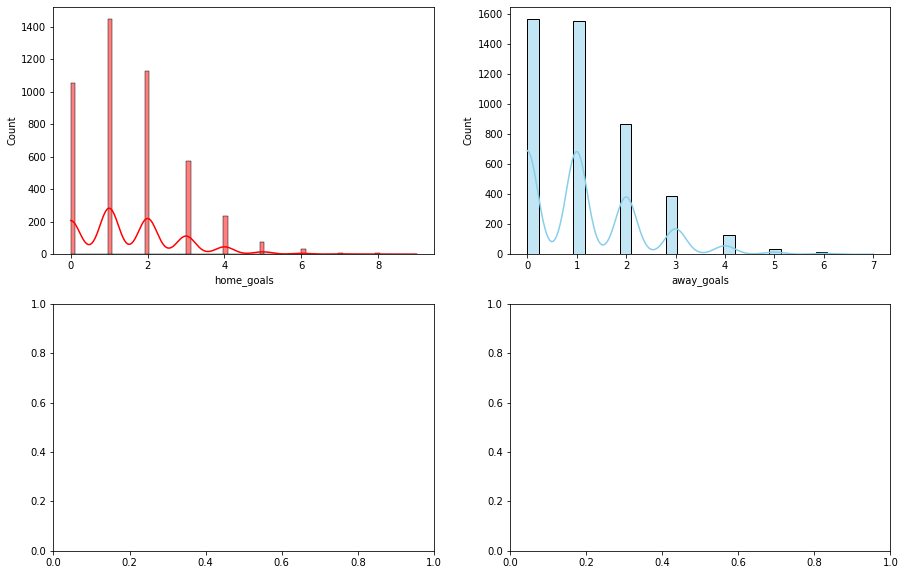

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=da,x="home_goals",kde=True,color="red",ax=axs[0,0])
sns.histplot(data=da,x="away_goals",kde=True,color="skyblue",ax=axs[0,1])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

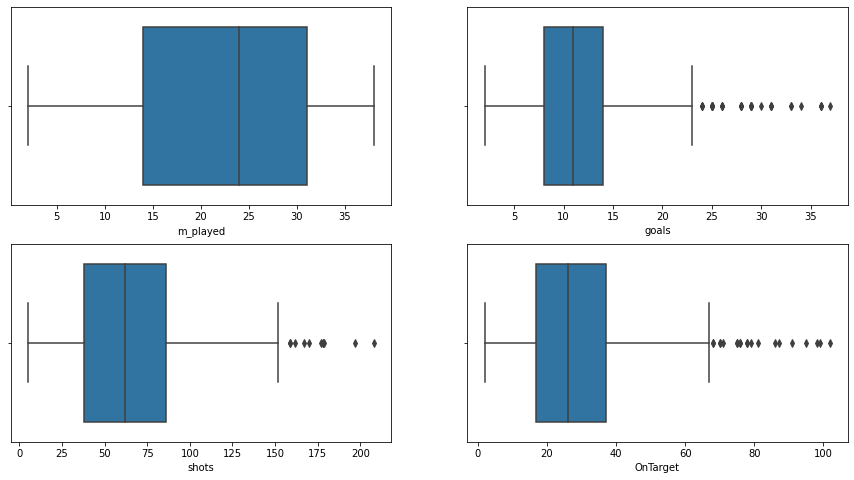

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,8))
sns.boxplot(da['m_played'],ax=axs[0,0])
sns.boxplot(da['goals'],ax=axs[0,1])
sns.boxplot(da['shots'],ax=axs[1,0])
sns.boxplot(da['OnTarget'],ax=axs[1,1])

In [ ]:
#Matches PLayed
qm25,qm50,qm75 = np.percentile(da['m_played'],[25,50,75])
iqrm = qm75 - qm25
minm= qm25 - 1.5*iqrm
maxm= qm75 + 1.5*iqrm
data= da[(da['m_played']>minm)&(da['m_played']< maxm )]

In [ ]:
#goals
qg25,qg50,qg75 = np.percentile(da['goals'],[25,50,75])
iqrg = qg75 - qg25
maxg= qg75 + 1.5*iqrg
data = da[da['goals']<maxg]

In [ ]:
#shots
qs25,qs50,qs75 = np.percentile(da['shots'],[25,50,75])
iqrs = qs75 - qs25
maxs= qs75 + 1.5*iqrs
data= da[(da['shots']< maxs )]

In [ ]:
#OnTarget
qo25,qo50,qo75 = np.percentile(da['OnTarget'],[25,50,75])
iqro = qo75 - qo25
maxo = qo75 + 1.5*iqro
data= da[(da['OnTarget']< maxo )]

In [ ]:
data.shape

(638, 14)

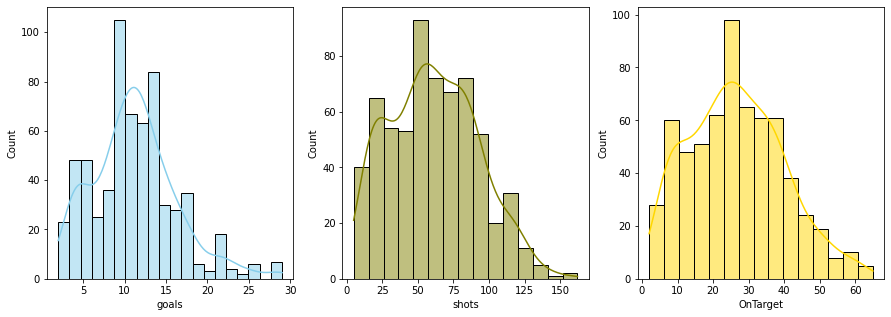

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))
      
sns.histplot(data= data, x="goals", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="shots", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="OnTarget", kde=True, color="gold", ax=axs[2])

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


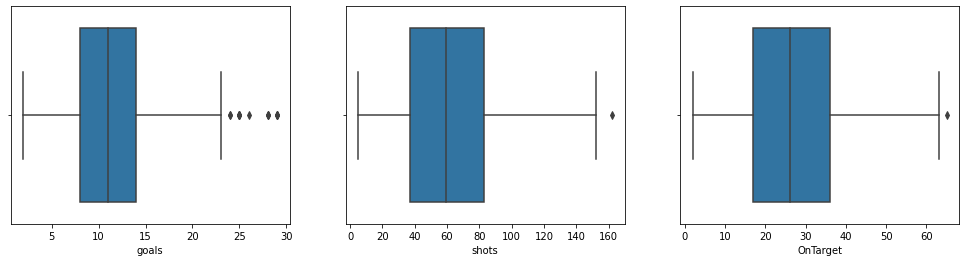

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(17, 4))

sns.boxplot(data['goals'], ax = axs[0])
sns.boxplot(data['shots'], ax = axs[1])
sns.boxplot(data['OnTarget'], ax = axs[2])

plt.show()

In [ ]:
data['League'] = data['League'].replace({1 : 'La Liga', 2 : 'Serie A',3 : 'Bundesliga',4 : 'Premier League', 5 : 'France Ligue', 6: 'MLS'  })

data['Country'] = data.Country.replace({1 : 'Spain', 2 : 'Italy', 3: 'Germany', 4: 'England',5:'Brazil'})



<ipython-input-87-decd0d0152be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['League'] = data['League'].replace({1 : 'La Liga', 2 : 'Serie A',3 : 'Bundesliga',4 : 'Premier League', 5 : 'France Ligue', 6: 'MLS'  })
<ipython-input-87-decd0d0152be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country'] = data.Country.replace({1 : 'Spain', 2 : 'Italy', 3: 'Germany', 4: 'England',5:'Brazil'})


In [ ]:
categorical = data[['Country','League']]
categorical.head()

Country   League
0   Spain  La Liga
1   Spain  La Liga
2   Spain  La Liga
3   Spain  La Liga
4   Spain  La Liga

In [ ]:
dummy=pd.get_dummies(categorical,drop_first=True)
dummy

Country_Brazil  Country_England  Country_France  Country_Germany  \
0                 0                0               0                0   
1                 0                0               0                0   
2                 0                0               0                0   
3                 0                0               0                0   
4                 0                0               0                0   
..              ...              ...             ...              ...   
655               0                0               0                0   
656               0                0               0                0   
657               0                0               0                0   
658               0                0               0                0   
659               0                0               0                0   

     Country_Italy  Country_Portugal   Country_Spain  Country_USA  \
0                0                  0              1            0   
1                0                  0              1            0   
2                0                  0              1            0   
3                0                  0              1            0   
4                0                  0              1            0   
..             ...                ...            ...          ...   
655              0                  0              0            0   
656              0                  0              0            0   
657              0                  0              0            0   
658              0                  0              0            0   
659              0                  0              0            0   

     League_Campeonato Brasileiro SÃ©rie A  League_Eredivisie  ...  \
0                                        0                  0  ...   
1                                        0                  0  ...   
2                                        0                  0  ...   
3                                        0                  0  ...   
4                                        0                  0  ...   
..                                     ...                ...  ...   
655                                      0                  1  ...   
656                                      0                  1  ...   
657                                      0                  1  ...   
658                                      0                  1  ...   
659                                      0                  1  ...   

     League_France Ligue 5  League_France Ligue 6  League_France Ligue 7  \
0                        0                      0                      0   
1                        0                      0                      0   
2                        0                      0                      0   
3                        0                      0                      0   
4                        0                      0                      0   
..                     ...                    ...                    ...   
655                      0                      0                      0   
656                      0                      0                      0   
657                      0                      0                      0   
658                      0                      0                      0   
659                      0                      0                      0   

     League_France Ligue 8  League_France Ligue 9  League_La Liga  League_MLS  \
0                        0                      0               1           0   
1                        0                      0               1           0   
2                        0                      0               1           0   
3                        0                      0               1           0   
4                        0                      0               1           0   
..                     ...                    ...          

In [ ]:
numerical = data[['m_played','goals','shots','OnTarget']]
skew_limit=0.75
skew_vals = numerical.skew()
skew_vals

m_played   -0.323279
goals       0.669386
shots       0.277415
OnTarget    0.338826
dtype: float64

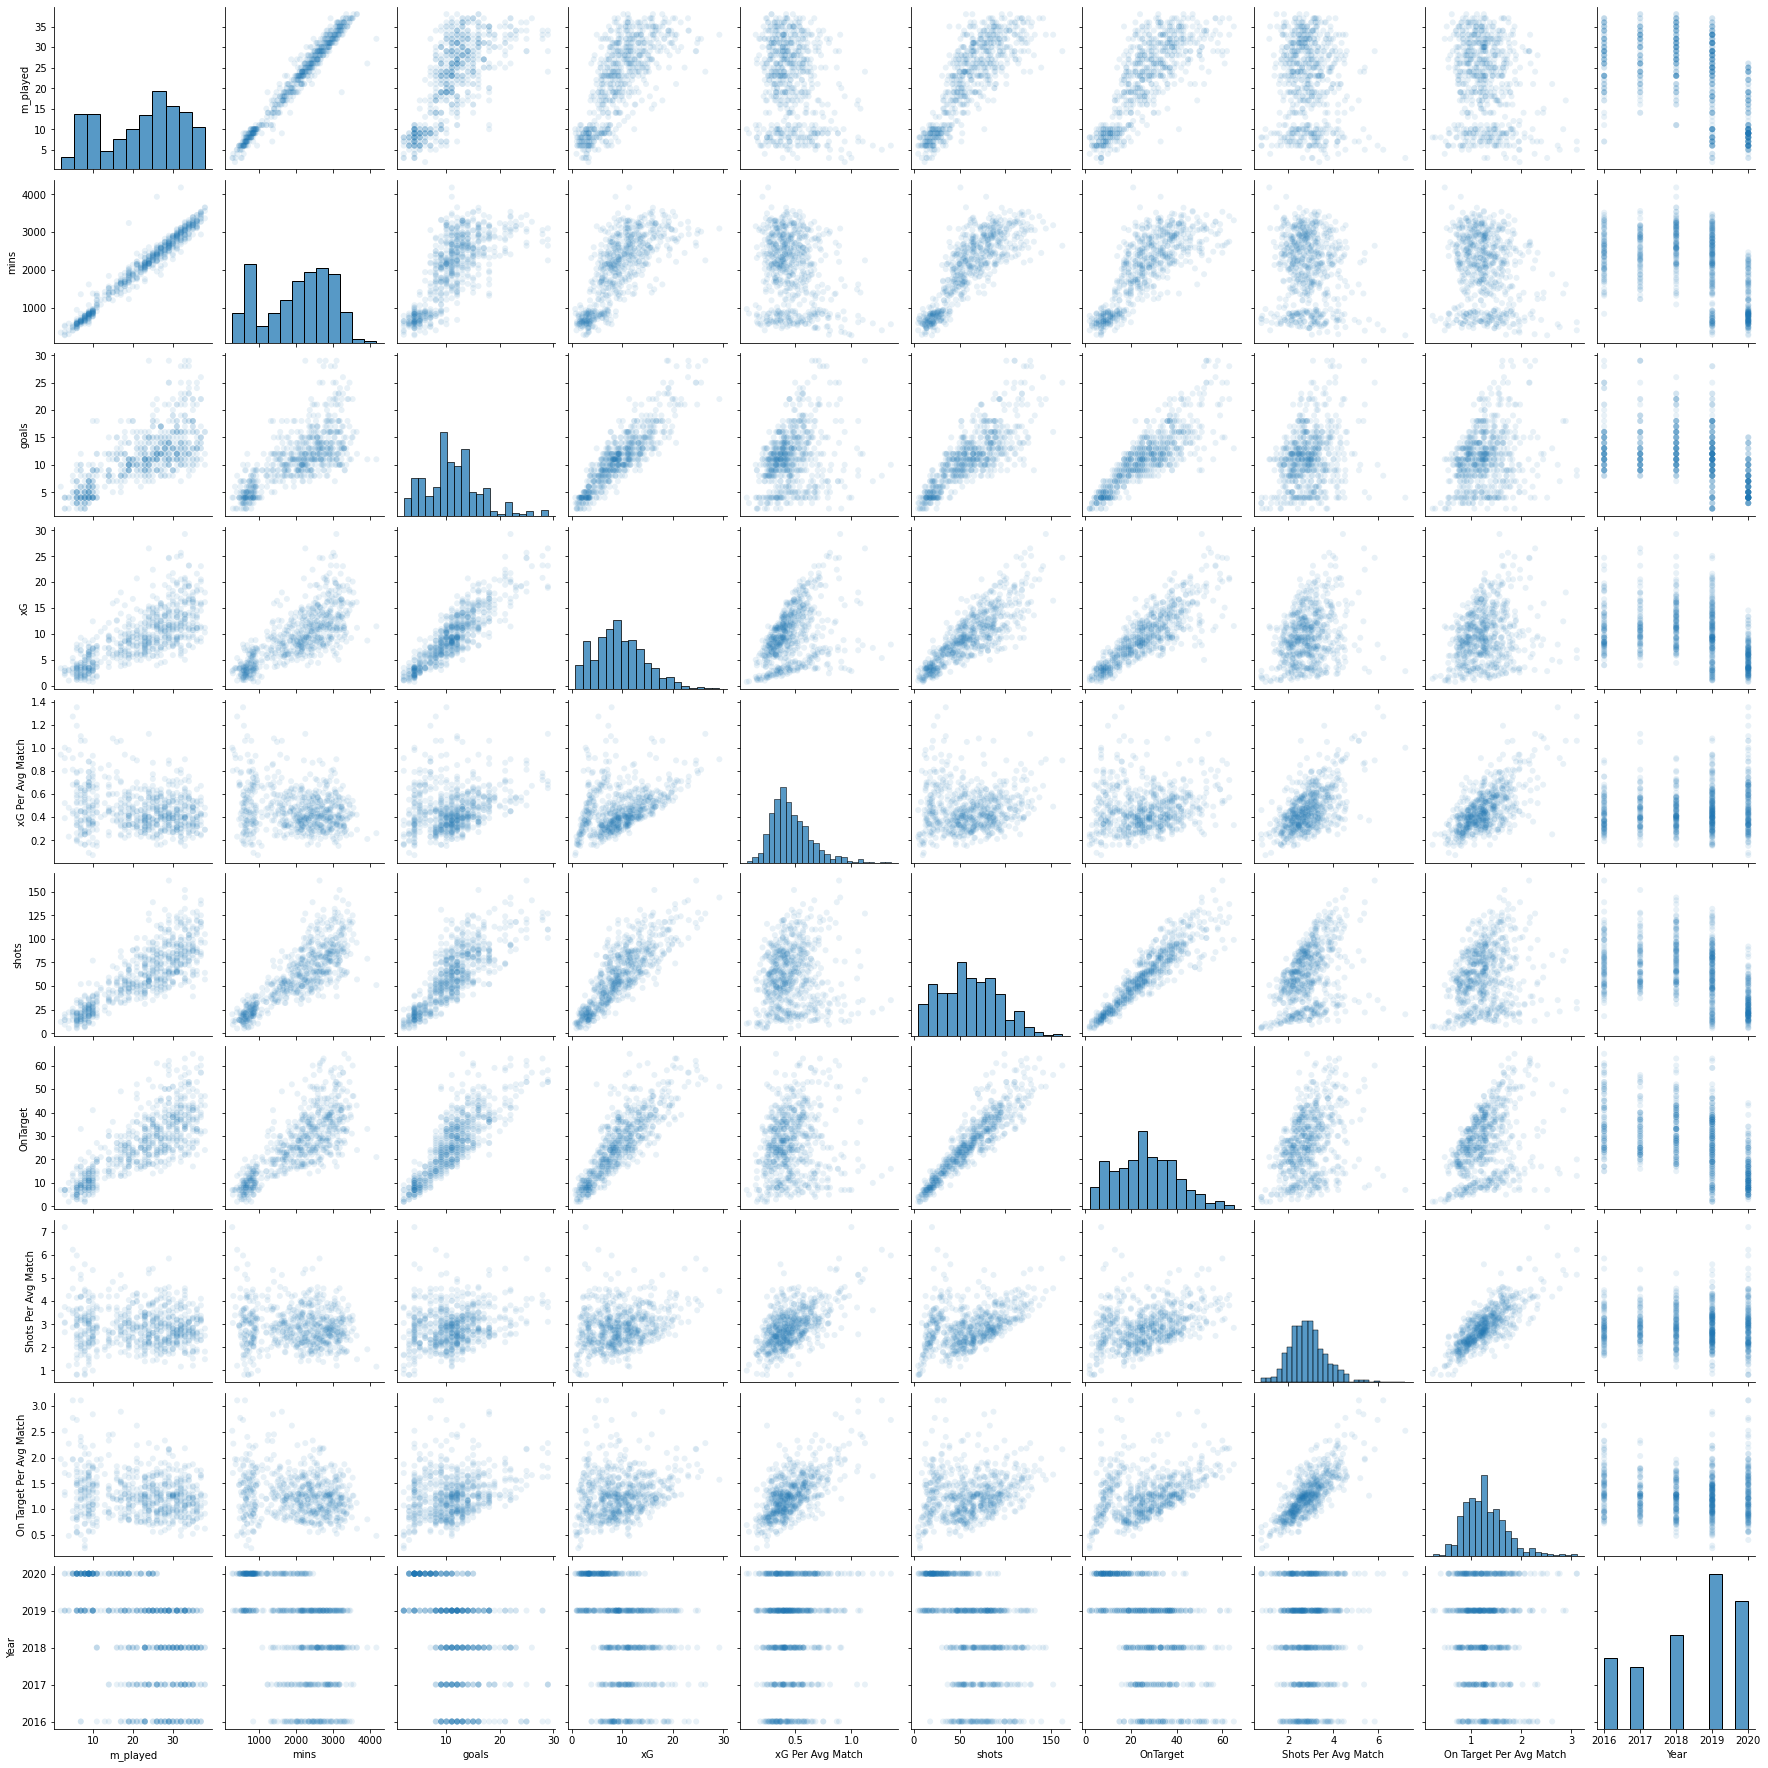

In [ ]:
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))